In [1]:
import PyPDF2
import matplotlib.pyplot as plt


# # creating an object 
# file = open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf', 'rb')



# # creating a pdf reader object
# fileReader = PyPDF2.PdfFileReader(file)



# # print the number of pages in pdf file
# print(fileReader.numPages)

In [2]:
# file = open('David J. Griffiths - Introduction to Electrodynamics (1999, Prentice-Hall) - libgen.lc.pdf', 'rb')
# fileReader = PyPDF2.PdfFileReader(file)
# print(fileReader.numPages)

In [3]:
# import PyPDF2

# def Read(startPage, endPage):
#     global text
#     text = []
#     cleanText = ""
# import PyPDF2

# def Read(startPage, endPage):
#     global text
#     text = []
#     cleanText = ""
#     pdfFileObj = open('David J. Griffiths - Introduction to Electrodynamics (1999, Prentice-Hall) - libgen.lc.pdf', 'rb')
#     pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#     while startPage <= endPage:
#         pageObj = pdfReader.getPage(startPage)
#         text += pageObj.extractText()
#         startPage += 1
#     pdfFileObj.close()
#     for myWord in text:
#         if myWord != '\n':
#             cleanText += myWord
#     text = cleanText.split()
#     return text





In [4]:
# fileReader
import re
import pdfplumber

# file = pdfplumber.open('David J. Griffiths - Introduction to Electrodynamics (1999, Prentice-Hall) - libgen.lc.pdf')
file = pdfplumber.open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf')



for x in range(400,500):
#     Read(x,x+1)
#     text_=pageObj.extractText()
    text_=file.pages[x].extract_text()
    
    if 'Index' in text_ :
        text_=text_.replace('Index','')
        text_=text_.replace('INDEX','')
# #         text_=text_.replace('Ex.','')
# #         text_=text_.replace('( ','(')
# #         text_=text_.replace('( ','(')
# #         text_=text_.replace('() ',',')
# #     text_=text_.lower()
        text_ = ''.join([i if not i.isdigit() else ' ' for i in text_])

        text_=text_.replace(':', ' ')
#         text_=re.split(' ',text_)

#         text_=[x for x in text_ if len(x)>1]
# # #         xx=''
# #         for x in text_ :
# #             if len(x)>1:
#                 xx=xx+' '+x
        text_=text_.split('\n')

        text_=[x.replace('\n','') for x in text_]
        print(text_)
#         text_=[x for x in text_ if len(x)>2]
        print([x for x in text_ if x[0].isupper()==1])
        break


[' ', 'A  Bessel’s  inequality,      ', 'Bilinear  form,     ,    ,     ', 'Adjoint  ', 'diagonalization  of,     ', 'classical,     ,      ', 'group  preserving,      ', 'of transformation,      ', 'matrix  of,     ', 'Admissible  sltbspace,      ', 'non-degenerate  (non-singular),      ', 'Algebra,      ', 'positive  definite,      ', 'of formal  power  series,      ', 'rank  of,     ', 'self-adjoint,      ', 'signature  of,     ', 'Algebraically  closed  field,      ', 'skew-symmetric,      ', 'Alternating  n-linear  function,     ,     ', 'symmetric,      ', 'Annihilator  ', 'of subset,      ', 'of sum  and intersection,     (Ex.    ) ', 'C ', 'of vector  (T-annihilator),     ,     ,      ', 'Approximation,      ', 'Cauchy-Schwars  inequality,      ', 'Associativity,    ', 'Cayley-Hamilton  theorem,     ,     ', 'of matrix  multiplicat,ion,    ,    ', 'of vector  addition,      Cayley  transform,     (Ex.   ) ', 'Augmented  matrix,      Characteristic  ', 'Axiom  of choice,       o

In [5]:
text_[11]

'Algebra,      '

In [6]:
#         text_=[x for x in text_ if len(x)>1]
# # #         xx=''
# #         for x in text_ :
# #             if len(x)>1:
#                 xx=xx+' '+x

In [7]:
x0 = 0    # Distance of left side of character from left side of page.
x1 = 0.4  # Distance of right side of character from left side of page.
y0 = 0  # Distance of bottom of character from bottom of page.
y1 = 1  # Distance of top of character from bottom of page.

import pdfplumber

file = pdfplumber.open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf')

node_list = []


for x in range(400,415):
    all_content = []
    page = file.pages[x]
    
    width = page.width
    height = page.height

    # Crop pages
    left_bbox = (0*float(width), y0*float(height), x1*float(width), y1*float(height))
    page_crop = page.crop(bbox=left_bbox)
    left_text = page_crop.extract_text()

    right_bbox = (x1*float(width), y0*float(height), 1*float(width), y1*float(height))
    page_crop = page.crop(bbox=right_bbox)
    right_text = page_crop.extract_text()
    page_context = '\n'.join([left_text, right_text])
    all_content.append(page_context)

    text_=all_content#.extract_text()

    if 'Index' in text_[0]:
        new_text_ = text_[0].split(',')
        new_text_ = list(new_text_)

        for y in range(len(new_text_)):
            if new_text_[y].isdigit():
                pass
            else:
                result = ''.join([i for i in new_text_[y] if not i.isdigit()])
                node_list.append(result.replace('\n',''))

node_list = [name for name in node_list if name.strip()]
node_list = [name.lstrip() for name in node_list]
node_list = [name for name in node_list if name[0].isupper()]

In [8]:
for i,node in enumerate(node_list):
    node = ' '.join( [w for w in node.split() if len(w)>1] )
    node = node.split(':')
    node = node[0].replace('Index ','')
    node_list[i] = node
node_list

['Adjoint',
 'Admissible sltbspace',
 'Algebra',
 'Algebraically closed field',
 'Alternating n-linear function',
 'Annihilator',
 'Approximation',
 'Associativity',
 'Augmented matrix',
 'Axiom of choice',
 'Basis',
 'Bessel’s inequality',
 'Bilinear form',
 'Cauchy-Schwars inequality',
 'Cayley-Hamilton theorem',
 'Cayley transform',
 'Classical adjoint',
 'Coefficients of polynomial',
 'Cofactor',
 'Column',
 'Commutative',
 'Companion matrix',
 'Complementary subspace',
 'Composition',
 'Conductor',
 'Congruence',
 'Conjugate',
 'Conjugation',
 'Coset',
 'Cramer’s rule',
 'Cyclic',
 'Degree',
 'Dependence',
 'Derivative of polynomial',
 'Determinant function',
 'Determinant rank',
 'Diagonalization',
 'Differential equations',
 'Direct sum',
 'Disjoint subspaces (see Independent',
 'Dual',
 'Eigenvalue (see Characteristic',
 'Jordan matrix',
 'Empty set',
 'Entries of matrix',
 'Equiva',
 'Equivalent systems of equations',
 'Euclidean space',
 'Exterior (wedge) product',
 'F”',
 'F

In [67]:
page_list = [[] for i in range(192)] 
node_list=[x.lower() for x in node_list]

dict_node_appearances={};
for node in node_list:
    dict_node_appearances[node]=[] 
    
for x in range(400):
    text_=file.pages[x].extract_text();    text_=text_.replace('\n','');     text_=text_.lower()
    for node in node_list:    
        if node in text_:             
            dict_node_appearances[node].append(x)



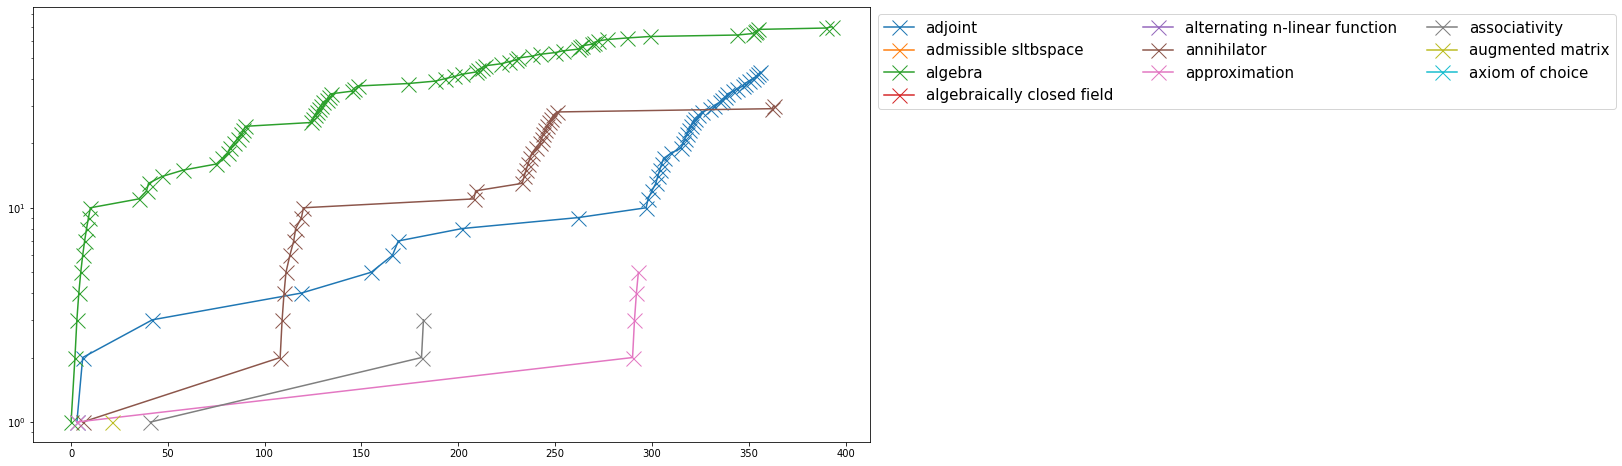

In [72]:
fig,ax = plt.subplots(1,1,figsize=(15,8))
ff=15
num_plot=10
for node in node_list[:num_plot]:
    ax.plot(dict_node_appearances[node],range(1,len(dict_node_appearances[node])+1),marker='x',label=node, markersize=ff)
ax.legend(ncol=3,bbox_to_anchor=(1,1),fontsize=ff)
ax.set_yscale('log',base=10)
# ax.set_xscale('log',base=10)


In [56]:
text_

'appendix older  than  y.’  if  x  is a set,  what  does  it  take  to  determine  a relation  be- tween  pairs  of  elements  of  x?  what  it  takes,  evidently,  is a rule  for  deter- mining  whether,  for  any  two  given  elements  x  and  y  in  x,  x  stands  in the  given  relationship  to  y or  not.  such  a rule  r,  we  shall  call  a  (binary) relation  on  x.  if  we  wish  to  be  slightly  more  precise,  we  may  proceed as follows.  let  x  x  x  denote  the  set of  all  ordered  pairs  (x, y)  of elements of  x.  a  binary  relation  on  x  is a function  r  from  x  x  x  into  the  set (0,  l}.  in  other  words,  r  assigns  to  each  ordered  pair  (z, y)  either  a 1 or a 0. the  idea  is that  if  r(x,  y)  =  1, then  x stands  in the  given  relationship to  y, and  if  r(x,  y)  =  0,  it  does  not. if  r  is a binary  relation  on  the  set x,  it  is convenient  to  write  xry when  r(x,  y)  =  1. a binary  relation  r  is called (1)  reflexive,  if  x

In [64]:
'axiom of choice' in 'axiom of choice='

True